# HIV Model

_Shashank Swaminathan_

In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

import sys
modsim_path = !echo $(pwd)/..
sys.path.insert(0, modsim_path[0])

# import functions from the modsim.py module
from modsim import *

In [2]:
state = State(R=200, L=0, E=0, V=100)
system = System(init = state, gamma=1.36, mu=1.36e-3, tau=0.2, beta=0.00027, p=0.1, alpha=3.6e-2, sigma=2, \
                delta=0.33, pi=100, t0=0, t_end = 100, dt = 0.1)

,values
init,R 200 L 0 E 0 V 100 dtype: int64
gamma,1.36
mu,0.00136
tau,0.2
beta,0.00027
p,0.1
alpha,0.036
sigma,2
delta,0.33
pi,100


In [3]:
def update_func(state, dt, system):
    """Update the HIV model.
    
    state: State (R, L, E, V)
    t: time
    system: System object
    
    returns: State (hiv)
    """
    R, L, E, V = state
    unpack(system)

    dR_dt = gamma*tau - mu*R - beta*R*V
    dL_dt = p*beta*R*V - mu*L - alpha*L
    dE_dt = (1-p)*beta*R*V + alpha*L -delta*E
    dV_dt = pi*E - sigma*V
    
    R = R + dR_dt*dt
    L = L + dL_dt*dt
    E = E + dE_dt*dt
    V = V + dV_dt*dt
    
    return State(R=R, L=L, E=E, V=V)

In [4]:
def run_simulation(system, update_func):
    """Runs a simulation of the system.
        
    system: System object
    update_func: function that updates state
    
    returns: TimeFrame
    """
    
    frame = TimeFrame(columns=system.init.index)
    frame.row[system.t0] = system.init
    
    timesteps = pd.Series(np.linspace(system.t0, system.t_end, int(system.t_end/system.dt)))
    
    for t in timesteps.index[:-1]:
        frame.row[timesteps[t+1]] = update_func(frame.row[timesteps[t]], system.dt, system)
    
    return frame

In [5]:
res = run_simulation(system, update_func)

,R,L,E,V
0.000000,200,0,0,100
0.100100,199.46,0.054,0.486,80
0.200200,199.029,0.0968816,0.857907,68.86
0.300300,198.659,0.133524,1.16298,63.6671
0.400400,198.318,0.167174,1.43243,62.5635
0.500501,197.983,0.20005,1.68726,64.3751
0.600601,197.639,0.233715,1.94201,68.3727
0.700701,197.275,0.269327,2.20714,74.1183
0.800801,196.88,0.307799,2.49058,81.366
0.900901,196.448,0.349902,2.79877,89.9985


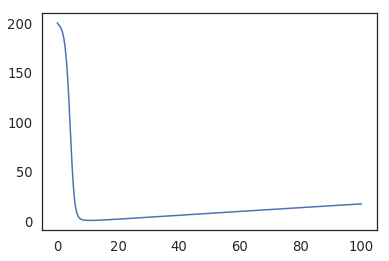

In [6]:
res.R.plot()

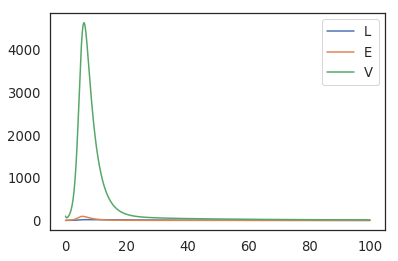

In [7]:
res.L.plot()
res.E.plot()
res.V.plot()
plt.legend(['L', 'E', 'V'])

# A Better Way to Model

Compared to modeling in Python, where both the physical and mathematical (programmatic) aspects of modeling must be considered, there exists a DSL where only the physical equations of the system is needed. This language is **Modelica**. It is an object-oriented, component-based modeling language where physical systems are represented purely by their constituent equations; the actual method of solving is left to the tool, conveniently abstracting out the modeling process to only the physics aspect for the modeler. To illustrate the ease with which one can model systems using such a language, the HIV model above is rewritten into the Modelica language; if one were to run this in a Modelica tool, such as the open source OpenModelica, this code would produce the same results as seen above.

In [ ]:
within code.HIV;

model HIVModel
  // Parameters
  parameter Real gamma = 1.36;
  parameter Real tau = 0.2;
  parameter Real mu = 1.36e-3;
  parameter Real beta = 0.00027;
  parameter Real rho = 0.1;
  parameter Real alpha = 3.6e-2;
  parameter Real sigma = 2;
  parameter Real delta = 0.33;
  parameter Real pi = 100;
  
  // Initial values
  parameter Real R_start = 200;
  parameter Real L_start = 0;
  parameter Real E_start = 0;
  parameter Real V_start = 100;
  
  // Stocks
  Real R;
  Real L;
  Real E;
  Real V;
  Real total_lymph;
initial equation
  R = R_start;
  L = L_start;
  E = E_start;
  V = V_start;
equation
  der(R) = gamma*tau - mu*R - beta*R*V;
  der(L) = rho*beta*R*V - mu*L - alpha*L;
  der(E) = (1-rho)*beta*R*V + alpha*L - delta*E;
  der(V) = pi*E - sigma*V;
  total_lymph = 1000*(1-tau) + R + L + E;
end HIVModel;